# Problem 2: decomposition of sinusoids

Alongside this exercise is a data file containing time- and sample values for a sinusoid with frequency $f=5\text{ Hz}$, with unknown magnitude and phase components. The code cell below is used to load the data and produce a plot of the sinusoid.

Text(0.5, 1.0, 'Mystery $5\\text{ Hz}$ sinusoid')

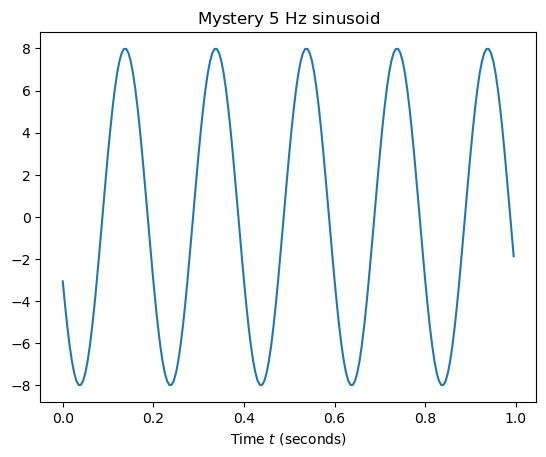

In [2]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
file_contents = loadmat("unknown_sinusoid.mat")
t = file_contents["t"].flatten()
x = file_contents["x"].flatten()
plt.close(1); plt.figure(1)
plt.plot(t, x)
plt.xlabel("Time $t$ (seconds)")
plt.title("Mystery $5\\text{ Hz}$ sinusoid")

Our task in this problem is to find a way to ***computationally*** identify the magnitude and phase of the sinusoid $x(t)$ by decomposing it into a cosine function with amplitude $A_x$ and a sine function with amplitude $A_y$. In order to accomplish this we make use of the product identities for trigonometric functions, from which we can infer the result of multiplying two sinusoid functions:

$$\cos(\alpha) \cdot \cos(\beta) = \frac{ \cos(\alpha + \beta) + \cos(\alpha - \beta)}{2} \tag{1}$$

*Remember: $\sin(x) = \cos(x - 90^{\circ})$.*


Output()

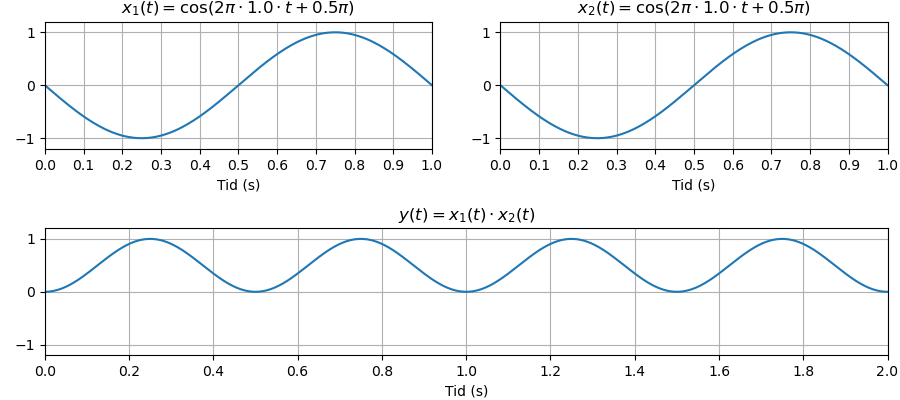

In [3]:
from demos import FrequencyMixingDemo
%matplotlib ipympl
FrequencyMixingDemo(fig_num=2);

## a)

Given one set of sinusoid multiplications (1-4)and another set of functions(A-D), match each multiplication of sinusoids with one of the functions.
1. $\cos(\omega \cdot t ) \cdot \cos(\omega \cdot t)$
2. $\cos(\omega \cdot t ) \cdot \sin(\omega \cdot t)$
3. $-\sin(\omega \cdot t ) \cdot \cos(\omega \cdot t)$
4. $\sin(\omega \cdot t ) \cdot \sin(\omega \cdot t)$


A. $\frac{1}{2} \cdot \sin(2\omega \cdot t)$<br>
B. $\frac{1}{2} - \frac{1}{2} \cdot \cos(2\omega \cdot t)$<br>
C. $-\frac{1}{2} \cdot \sin(2\omega \cdot t)$<br>
D. $\frac{1}{2} + \frac{1}{2} \cdot \cos(2\omega \cdot t)$

Write your answer in the markdown cell below.

ANSWER THEORY QUESTIONS HERE:

1 --> D (Utilizing the trig identity $cos^2(A)=\frac{1 + cos(2A)}{2}$)

2 --> A (Utilizing the trig identity $sin(A)cos(B) = \frac{sin(A+B)+sin(A-B)}{2}$)

3 --> C (Utilizing the trig identity $sin(A)cos(B) = \frac{sin(A+B)+sin(A-B)}{2}$)

4 --> B (Utilizing the trig identity $sin^2(A)=\frac{1 - cos(2A)}{2}$)

As we observed in problem **a)**, all of the sinusoid product functions contain a new sinusoid term with $2\times$ the frequency, but only some of them contain a constant term. Now let's complicate matters somewhat, and see what happens when we multiply any sinusoid $x(t) = A_x\cdot \cos(\omega\cdot t) + A_y \cdot \sin(\omega \cdot t)$ of frequency $\omega$ by either a sine or a cosine function.


## b)

A. $\left(A_x \cdot \cos(\omega \cdot t) + A_y \cdot \sin(\omega \cdot t)\right) \cdot \cos(\omega\cdot t)$ <br>
B. $\left(A_x \cdot \cos(\omega \cdot t) + A_y \cdot \sin(\omega \cdot t)\right) \cdot \sin(\omega\cdot t)$

1. $\frac{A_x}{2} + \frac{A_x}{2} \cdot \cos(2\omega \cdot t) + \frac{A_y}{2} \cdot \sin(2\omega \cdot t)$<br>
3. $\frac{A_x}{2} + \frac{A_x}{2} \cdot \sin(2\omega \cdot t) + \frac{A_y}{2} - \frac{A_y}{2} \cdot \cos(2\omega \cdot t)$ <br>
2. $\frac{A_x}{2} \cdot \sin(2\omega \cdot t) + \frac{A_y}{2} - \frac{A_y}{2} \cdot \cos(2\omega \cdot t)$<br>
4. $\frac{A_x}{2} \cdot \sin(2\omega \cdot t) - \frac{A_y}{2} \cdot \cos(2\omega \cdot t)$

Match each multiplication of sinusoids with one of the functions.

ANSWER THEORY QUESTIONS HERE:

A --> 1

B --> 3

## c)

Uisng the sinusoid $x(t)$ from the data file, calculate $x(t) \cdot \cos(2\pi \cdot t)$ and $x(t)\cdot \sin(2\pi \cdot t)$ with python, and create a plot containing the curves of both product functions. What is the main difference between the two curves?

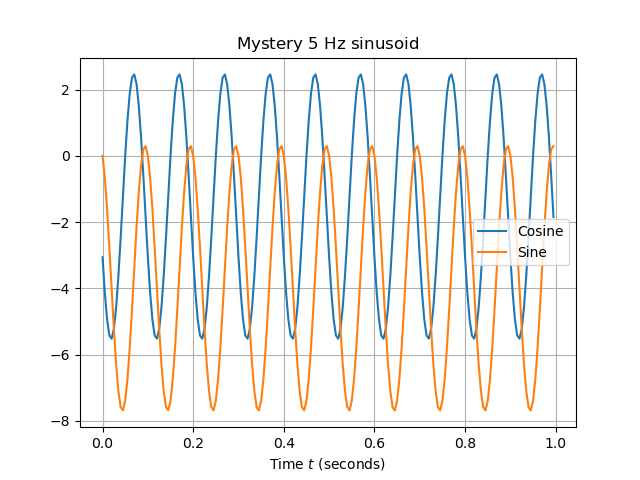

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.close(3); plt.figure(3) # Downside of using interactive ipympl plots. It is necessary to close and re-open figure when plotting again.
# WRITE YOUR CODE HERE:

f = 5

cosX = x.copy() * np.cos(2 * np.pi * f * t)
sinX = x.copy() * np.sin(2 * np.pi * f * t)

plt.plot(t,cosX,t,sinX)
plt.xlabel("Time $t$ (seconds)")
plt.title("Mystery $5\\text{ Hz}$ sinusoid")
plt.legend(["Cosine", "Sine"])
plt.grid(True)

*If you have answered the question correctly, the plot should look something like [this](Figurer/task2c_sol.png).*

The key to identifying the amplitudes $A_x$ and $A_y$ in the sinusoid $x(t)$, is to isolate the terms $\frac{A_x}{2}$ and $\frac{A_y}{2}$. This is accomplished by calculating the **mean** of $x(t) \cdot \cos(2\pi \cdot t)$ and $x(t)\cdot \sin(2\pi \cdot t)$ respectively.
## d)

Use python to calculate $A_x$ and $A_y$ for the sinusoid $x(t)$ from the data file. Finally, use $A_x$ and $A_y$ to calculate magnitude and phase for $x(t)$.

PS: The numpy-functions [`mean`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html), [`sqrt`](https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html) and [`arctan2`](https://numpy.org/doc/stable/reference/generated/numpy.arctan2.html) may come in handy.

A_x = -3.0614674589207187, A_y = -7.391036260090296, mag_x = 8.000000000000002, phi_x = 1.9634954084936207


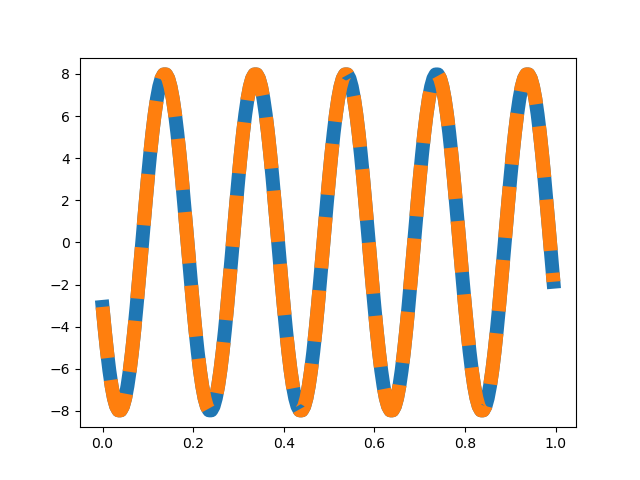

In [9]:
A_x = np.mean(cosX)*2
A_y = np.mean(sinX)*2
mag_x = np.sqrt(A_x**2 + A_y**2)
phi_x = np.arctan2(-A_y, A_x)
# WRITE YOUR CODE HERE:
f = 5

print(f"{A_x = }, {A_y = }, {mag_x = }, {phi_x = }")

newX = mag_x*np.cos(2*np.pi*f*t+phi_x)

plt.close(3); plt.figure(3)

plt.plot(t,x,t,newX,'--',linewidth=10)
plt.show()

Not sure whether your answer is correct? How about generating a new sinusoid based on the answers you have calculated, and plotting it alongside $x(t)$? It should look something like [this](Figurer/Task2d_sol.png).